In [44]:
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import os
import json
import geoplot
import pysal
from pysal.lib import weights
import mapclassify as mc
import rioxarray as rxr
import contextily as ctx
import rasterio as rio

In [45]:
baronies = gpd.read_file('/Users/mensab/Documents/GISMapFiles/Baronies_-_OSi_National_Statutory_Boundaries_Generalised')
#baronies = baronies.to_crs(epsg=4326)
baronies.crs

<Projected CRS: EPSG:2157>
Name: IRENET95 / Irish Transverse Mercator
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: Ireland - onshore. United Kingdom (UK) - Northern Ireland (Ulster) - onshore.
- bounds: (-10.56, 51.39, -5.34, 55.43)
Coordinate Operation:
- name: Irish Transverse Mercator
- method: Transverse Mercator
Datum: IRENET95
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [4]:
sites_nw = gpd.read_file('filtered_points_2.shp')
sites_nw.crs


<Projected CRS: EPSG:2157>
Name: IRENET95 / Irish Transverse Mercator
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: Ireland - onshore. United Kingdom (UK) - Northern Ireland (Ulster) - onshore.
- bounds: (-10.56, 51.39, -5.34, 55.43)
Coordinate Operation:
- name: Irish Transverse Mercator
- method: Transverse Mercator
Datum: IRENET95
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

<Axes: >

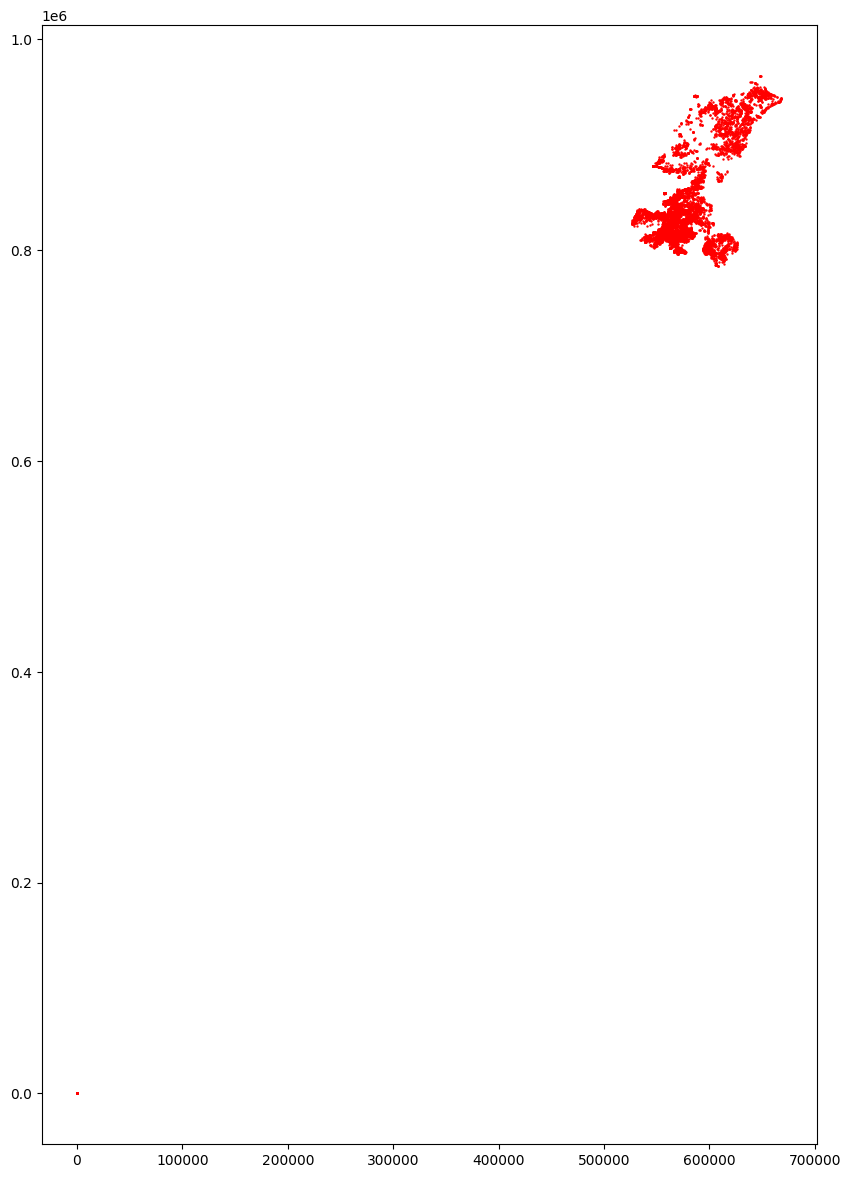

In [46]:
sites_nw.plot(figsize=(10,15), color='red', markersize=0.5)

In [6]:
baronies.info

<bound method DataFrame.info of       BY_ID                       ENGLISH                           GAEILGE  \
0     39010                   TULLA LOWER              An Tulach Íochtarach   
1     49008  CARBERY WEST (West Division)  Cairbrigh Thiar (an Roinn Thiar)   
2    219014                     GLENAHIRY                 Gleann na hUidhre   
3    179005                        TROUGH                        An Triúcha   
4     79003               DUNKERRON NORTH               Dún Ciaráin Thuaidh   
..      ...                           ...                               ...   
275   69019                       MOYCARN                    Maigh Charnáin   
276  239013                 ATHLONE SOUTH            Baile Átha Luain Theas   
277   59006                  RAPHOE NORTH                Ráth Bhoth Thuaidh   
278   99003                    FASSADININ                Fásach an Deighnín   
279  119001                   CARRIGALLEN                    Carraig Álainn   

    LOGAINM_ID     

In [47]:
# selest all baronies where county is donegal sligo and leitrim
baronies_NW = baronies[baronies['COUNTY'].isin(['DONEGAL', 'SLIGO', 'LEITRIM'])]
#baronies_NW.info()
baronies_NW.head()
#baronies_NW.__class__


,BY_ID,ENGLISH,GAEILGE,LOGAINM_ID,CONTAE,COUNTY,PROVINCE,GUID,CENTROID_X,CENTROID_Y,AREA,OBJECTID,Shape__Are,Shape__Len,geometry
12,59008,TIRHUGH,Tír Aodha,52,Dún na nGall,DONEGAL,Ulster,2ae19629-11ec-13a3-e055-000000000001,599471.23,873654.18,5.197514e+08,13,5.197586e+08,200162.686389,"MULTIPOLYGON (((595713.002 881098.568, 596161...."
42,119002,DRUMAHAIRE,Droim Dhá Thiar,137,Liatroim,LEITRIM,Connacht,2ae19629-111a-13a3-e055-000000000001,592206.80,829758.65,4.740572e+08,43,4.740812e+08,143658.292704,"POLYGON ((597990.378 818769.081, 596669.263 81..."
94,59005,KILMACRENAN,Cill Mhic Réanáin,55,Dún na nGall,DONEGAL,Ulster,2ae19629-11e9-13a3-e055-000000000001,603124.29,925861.29,1.262017e+09,95,1.261950e+09,565575.016132,"MULTIPOLYGON (((594771.077 934748.331, 594787...."
129,209003,CORRAN,An Corann,229,Sligeach,SLIGO,Connacht,2ae19629-115b-13a3-e055-000000000001,566808.50,814338.53,1.846223e+08,130,1.845969e+08,85627.186286,"POLYGON ((571532.180 816627.484, 571534.486 81..."
141,59001,BANAGH,Báinigh,54,Dún na nGall,DONEGAL,Ulster,2ae19629-11e5-13a3-e055-000000000001,573655.32,881367.13,7.226286e+08,142,7.226265e+08,305215.235318,"MULTIPOLYGON (((596157.164 893589.045, 596226...."


In [8]:
Iochtar_Connacht = [baronies_NW[""]] [baronies_NW['SLIGO']]
Iochtar_Connacht.__class__





KeyError: ''

In [55]:
# select an object id and plot it

baronies_NW[baronies_NW["OBJECTID"] == Iochtar_Connacht].plot()

NameError: name 'Iochtar_Connacht' is not defined

In [9]:
baronies_NW.describe

<bound method NDFrame.describe of       BY_ID         ENGLISH             GAEILGE LOGAINM_ID        CONTAE  \
12    59008         TIRHUGH           Tír Aodha         52  Dún na nGall   
42   119002      DRUMAHAIRE     Droim Dhá Thiar        137      Liatroim   
94    59005     KILMACRENAN   Cill Mhic Réanáin         55  Dún na nGall   
129  209003          CORRAN           An Corann        229      Sligeach   
141   59001          BANAGH             Báinigh         54  Dún na nGall   
142  209002        COOLAVIN       Cúil Ó bhFinn        228      Sligeach   
144  119003         LEITRIM            Liatroim        135      Liatroim   
161  209005        TIRERAGH      Tír Fhiachrach        230      Sligeach   
173   59003  INISHOWEN EAST  Inis Eoghain Thoir         57  Dún na nGall   
175  119005      ROSCLOGHER        Ros Clochair        138      Liatroim   
199   59007    RAPHOE SOUTH    Ráth Bhoth Theas         59  Dún na nGall   
204   59004  INISHOWEN WEST  Inis Eoghain Thiar       

In [10]:
sites_nw.info()
sites_nw.head()
#sites_nw.TOWNLAND.unique()
#sites_nw.TOWNLAND.nunique()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 10126 entries, 0 to 10125
Data columns (total 19 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   OID_        10126 non-null  int64   
 1   OBJECTID    10126 non-null  int64   
 2   ENTITY_ID   10126 non-null  object  
 3   CLASS_CODE  10126 non-null  object  
 4   SMRS        10126 non-null  object  
 5   COUNTY      10126 non-null  object  
 6   TOWNLAND    10126 non-null  object  
 7   COUNTY_ID   10126 non-null  int64   
 8   ZONE_ID     9388 non-null   object  
 9   ITM_E       10126 non-null  int64   
 10  ITM_N       10126 non-null  int64   
 11  LATITUDE    10126 non-null  float64 
 12  LONGITUDE   10126 non-null  float64 
 13  MONUMENT_T  10126 non-null  object  
 14  FIRST_EDIT  4133 non-null   object  
 15  LATEST_EDI  7831 non-null   object  
 16  WEBSITE_LI  10126 non-null  object  
 17  WEB_NOTES   10126 non-null  object  
 18  geometry    10126 non-null  geometry
d

,OID_,OBJECTID,ENTITY_ID,CLASS_CODE,SMRS,COUNTY,TOWNLAND,COUNTY_ID,ZONE_ID,ITM_E,ITM_N,LATITUDE,LONGITUDE,MONUMENT_T,FIRST_EDIT,LATEST_EDI,WEBSITE_LI,WEB_NOTES,geometry
0,2325,2325,LE00212,BOCA,LE004-021----,LEITRIM,"CULLIONBOY,GUBINEA",16,NaN,584601,848442,54.384370,-8.237059,Cairn - boundary cairn,Not indicated,Pile of Stones,https://maps.archaeology.ie/HistoricEnvironmen...,Marked only on the 1910 ed. of the OS 6-inch m...,POINT (584601.000 848442.000)
1,5325,5325,LE00213,BOCA,LE004-022----,LEITRIM,"CULLIONBOY,GUBINEA",16,NaN,584582,848323,54.383300,-8.237346,Cairn - boundary cairn,Not indicated,Pile of Stones,https://maps.archaeology.ie/HistoricEnvironmen...,Marked only on the 1910 ed. of the OS 6-inch m...,POINT (584582.000 848323.000)
2,5326,5326,LE00214,BOCA,LE004-023----,LEITRIM,"LECKANARAINEY,CULLIONBOY",16,NaN,585017,848121,54.381498,-8.230639,Cairn - boundary cairn,Not indicated,Pile of Stones,https://maps.archaeology.ie/HistoricEnvironmen...,Marked only on the 1910 ed. of the OS 6-inch m...,POINT (585017.000 848121.000)
3,7588,7588,LE00215,BOCA,LE004-024----,LEITRIM,"LECKANARAINEY,MEENAGRAUN",16,NaN,585422,848309,54.383199,-8.224414,Cairn - boundary cairn,Not indicated,Pile of Stones,https://maps.archaeology.ie/HistoricEnvironmen...,Marked only on the 1910 ed. of the OS 6-inch m...,POINT (585422.000 848309.000)
4,7591,7591,LE02287,GRSL,LE024-021005-,LEITRIM,KILTUBBRID,16,R168764,603625,810153,54.040539,-7.944657,Graveslab,Not indicated,Not indicated,https://maps.archaeology.ie/HistoricEnvironmen...,A tapering graveslab (L 0.78m; Wth 0.39-0.47m)...,POINT (603625.000 810153.000)


In [11]:
sites_nw.columns



Index(['OID_', 'OBJECTID', 'ENTITY_ID', 'CLASS_CODE', 'SMRS', 'COUNTY',
       'TOWNLAND', 'COUNTY_ID', 'ZONE_ID', 'ITM_E', 'ITM_N', 'LATITUDE',
       'LONGITUDE', 'MONUMENT_T', 'FIRST_EDIT', 'LATEST_EDI', 'WEBSITE_LI',
       'WEB_NOTES', 'geometry'],
      dtype='object')

In [12]:
baronies_NW.columns

Index(['BY_ID', 'ENGLISH', 'GAEILGE', 'LOGAINM_ID', 'CONTAE', 'COUNTY',
       'PROVINCE', 'GUID', 'CENTROID_X', 'CENTROID_Y', 'AREA', 'OBJECTID',
       'Shape__Are', 'Shape__Len', 'geometry'],
      dtype='object')

In [13]:
baronies_NW


,BY_ID,ENGLISH,GAEILGE,LOGAINM_ID,CONTAE,COUNTY,PROVINCE,GUID,CENTROID_X,CENTROID_Y,AREA,OBJECTID,Shape__Are,Shape__Len,geometry
12,59008,TIRHUGH,Tír Aodha,52,Dún na nGall,DONEGAL,Ulster,2ae19629-11ec-13a3-e055-000000000001,599471.23,873654.18,5.197514e+08,13,5.197586e+08,200162.686389,"MULTIPOLYGON (((595713.002 881098.568, 596161...."
42,119002,DRUMAHAIRE,Droim Dhá Thiar,137,Liatroim,LEITRIM,Connacht,2ae19629-111a-13a3-e055-000000000001,592206.80,829758.65,4.740572e+08,43,4.740812e+08,143658.292704,"POLYGON ((597990.378 818769.081, 596669.263 81..."
94,59005,KILMACRENAN,Cill Mhic Réanáin,55,Dún na nGall,DONEGAL,Ulster,2ae19629-11e9-13a3-e055-000000000001,603124.29,925861.29,1.262017e+09,95,1.261950e+09,565575.016132,"MULTIPOLYGON (((594771.077 934748.331, 594787...."
129,209003,CORRAN,An Corann,229,Sligeach,SLIGO,Connacht,2ae19629-115b-13a3-e055-000000000001,566808.50,814338.53,1.846223e+08,130,1.845969e+08,85627.186286,"POLYGON ((571532.180 816627.484, 571534.486 81..."
141,59001,BANAGH,Báinigh,54,Dún na nGall,DONEGAL,Ulster,2ae19629-11e5-13a3-e055-000000000001,573655.32,881367.13,7.226286e+08,142,7.226265e+08,305215.235318,"MULTIPOLYGON (((596157.164 893589.045, 596226...."
142,209002,COOLAVIN,Cúil Ó bhFinn,228,Sligeach,SLIGO,Connacht,2ae19629-115a-13a3-e055-000000000001,569573.44,802501.13,1.180191e+08,143,1.180437e+08,63882.383112,"POLYGON ((573091.398 801314.019, 573242.535 80..."
144,119003,LEITRIM,Liatroim,135,Liatroim,LEITRIM,Connacht,2ae19629-111b-13a3-e055-000000000001,602605.90,806183.21,2.496778e+08,145,2.496511e+08,119460.896107,"POLYGON ((601354.743 793462.633, 601188.767 79..."
161,209005,TIRERAGH,Tír Fhiachrach,230,Sligeach,SLIGO,Connacht,2ae19629-115d-13a3-e055-000000000001,543655.49,829156.03,3.945164e+08,162,3.944921e+08,136320.485437,"POLYGON ((553538.028 826672.610, 553225.615 82..."
173,59003,INISHOWEN EAST,Inis Eoghain Thoir,57,Dún na nGall,DONEGAL,Ulster,2ae19629-11e7-13a3-e055-000000000001,648936.31,948447.83,5.014883e+08,174,5.014800e+08,225573.450304,"MULTIPOLYGON (((657122.964 949241.006, 657205...."
175,119005,ROSCLOGHER,Ros Clochair,138,Liatroim,LEITRIM,Connacht,2ae19629-111d-13a3-e055-000000000001,586923.51,848567.44,3.482685e+08,176,3.482411e+08,118747.530360,"MULTIPOLYGON (((590232.163 839876.844, 590181...."


In [51]:
baronies_NW.explore()

In [14]:
#baronies_NW.loc[274].plot()
baronies_NW.columns


Index(['BY_ID', 'ENGLISH', 'GAEILGE', 'LOGAINM_ID', 'CONTAE', 'COUNTY',
       'PROVINCE', 'GUID', 'CENTROID_X', 'CENTROID_Y', 'AREA', 'OBJECTID',
       'Shape__Are', 'Shape__Len', 'geometry'],
      dtype='object')

<Axes: >

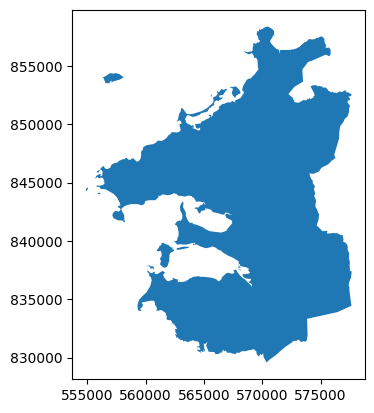

In [15]:
carbury = baronies_NW[baronies_NW['ENGLISH'] == 'CARBURY']
carbury.plot()

<Axes: >

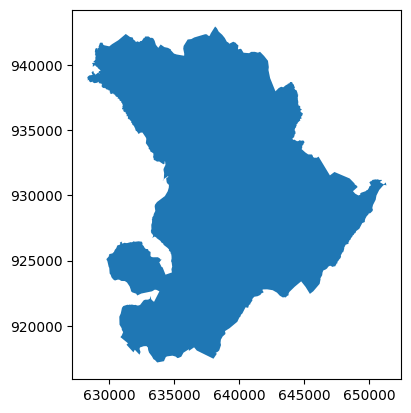

In [16]:
inishowen_west = baronies_NW[baronies_NW['ENGLISH'] == 'INISHOWEN WEST']
inishowen_west.plot()


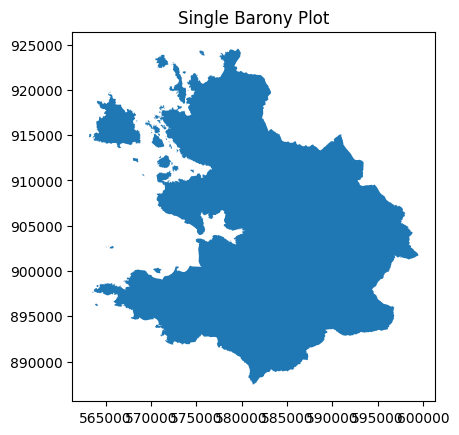

In [53]:
single_barony = baronies_NW.geometry[274]
# Create a GeoDataFrame with the single geometry
single_geometry_gdf = gpd.GeoDataFrame(geometry=[single_barony])

# Plot the single geometry
ax = single_geometry_gdf.plot()

# Add title to the plot
ax.set_title('Single Barony Plot')

# Show the plot
plt.show()






Index(['BY_ID', 'ENGLISH', 'GAEILGE', 'LOGAINM_ID', 'CONTAE', 'COUNTY',
       'PROVINCE', 'GUID', 'CENTROID_X', 'CENTROID_Y', 'AREA', 'OBJECTID',
       'Shape__Are', 'Shape__Len', 'geometry'],
      dtype='object')

<Axes: >

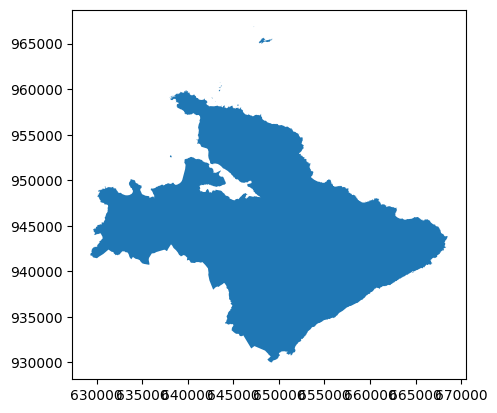

In [17]:
inishowen_east = baronies_NW[baronies_NW['ENGLISH'] == 'INISHOWEN EAST']
inishowen_east.plot()

In [18]:
outlier = sites_nw[(sites_nw['ITM_E'].between(-1, 1)) & (sites_nw['ITM_N'].between(-1, 1))]
outlier


,OID_,OBJECTID,ENTITY_ID,CLASS_CODE,SMRS,COUNTY,TOWNLAND,COUNTY_ID,ZONE_ID,ITM_E,ITM_N,LATITUDE,LONGITUDE,MONUMENT_T,FIRST_EDIT,LATEST_EDI,WEBSITE_LI,WEB_NOTES,geometry
47,31172,31172,DG01277,MIDD,DG047-023----,DONEGAL,INCH LEVEL (Inch ED),7,NaN,0,0,46.488181,-15.817314,Midden,NaN,NaN,https://maps.archaeology.ie/HistoricEnvironmen...,The Archaeological Survey of Ireland (ASI) is ...,POINT (0.000 0.000)
48,31173,31173,DG01278,MIDD,DG047-024----,DONEGAL,CARROWEN,7,NaN,0,0,46.488181,-15.817314,Midden,NaN,NaN,https://maps.archaeology.ie/HistoricEnvironmen...,The Archaeological Survey of Ireland (ASI) is ...,POINT (0.000 0.000)
51,31179,31179,DG01282,MIDD,DG048-004----,DONEGAL,INIS MHIC AN DOIRN,7,NaN,0,0,46.488181,-15.817314,Midden,NaN,NaN,https://maps.archaeology.ie/HistoricEnvironmen...,"Brunicardi (1914, 195) refers to pits containi...",POINT (0.000 0.000)
52,31180,31180,DG01283,HOWE,DG048-005----,DONEGAL,OILEÁN CRÓNA,7,NaN,0,0,46.488181,-15.817314,Ritual site - holy well,Not indicated,Not indicated,https://maps.archaeology.ie/HistoricEnvironmen...,OS 48:15:1 (Precise location not discovered) 2...,POINT (0.000 0.000)
61,31195,31195,DG01296,SOUT,DG052-004----,DONEGAL,CHURCH HILL,7,NaN,0,0,46.488181,-15.817314,Souterrain,NaN,NaN,https://maps.archaeology.ie/HistoricEnvironmen...,A souterrain apparently c. 4ft deep and 3ft wi...,POINT (0.000 0.000)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9919,154883,154883,DG03911,BATT,DG045-038----,DONEGAL,KILMACRENAN (Kilmacrenan ED),7,NaN,0,0,46.488181,-15.817314,Battlefield,NaN,NaN,https://maps.archaeology.ie/HistoricEnvironmen...,The Archaeological Survey of Ireland (ASI) is ...,POINT (0.000 0.000)
9920,154900,154900,LE02616,BATT,LE000-001----,LEITRIM,Unknown,16,NaN,0,0,46.488181,-15.817314,Battlefield,NaN,NaN,https://maps.archaeology.ie/HistoricEnvironmen...,The Archaeological Survey of Ireland (ASI) is ...,POINT (0.000 0.000)
9921,154911,154911,LE02617,BATT,LE000-002----,LEITRIM,Unknown,16,NaN,0,0,46.488181,-15.817314,Battlefield,NaN,NaN,https://maps.archaeology.ie/HistoricEnvironmen...,The Archaeological Survey of Ireland (ASI) is ...,POINT (0.000 0.000)
9922,154932,154932,SL07408,BATT,SL000-001----,SLIGO,Unknown,25,NaN,0,0,46.488181,-15.817314,Battlefield,NaN,NaN,https://maps.archaeology.ie/HistoricEnvironmen...,The Archaeological Survey of Ireland (ASI) is ...,POINT (0.000 0.000)


In [19]:
outlier.info


<bound method DataFrame.info of          OID_  OBJECTID ENTITY_ID CLASS_CODE           SMRS   COUNTY  \
47      31172     31172   DG01277       MIDD  DG047-023----  DONEGAL   
48      31173     31173   DG01278       MIDD  DG047-024----  DONEGAL   
51      31179     31179   DG01282       MIDD  DG048-004----  DONEGAL   
52      31180     31180   DG01283       HOWE  DG048-005----  DONEGAL   
61      31195     31195   DG01296       SOUT  DG052-004----  DONEGAL   
...       ...       ...       ...        ...            ...      ...   
9919   154883    154883   DG03911       BATT  DG045-038----  DONEGAL   
9920   154900    154900   LE02616       BATT  LE000-001----  LEITRIM   
9921   154911    154911   LE02617       BATT  LE000-002----  LEITRIM   
9922   154932    154932   SL07408       BATT  SL000-001----    SLIGO   
10045  158635    158635   SL01853       BURI  SL014-259----    SLIGO   

                           TOWNLAND  COUNTY_ID ZONE_ID  ITM_E  ITM_N  \
47             INCH LEVEL (Inch

In [20]:
outlier.nunique()


OID_          418
OBJECTID      418
ENTITY_ID     418
CLASS_CODE     55
SMRS          418
COUNTY          3
TOWNLAND      300
COUNTY_ID       3
ZONE_ID         1
ITM_E           1
ITM_N           1
LATITUDE        1
LONGITUDE       1
MONUMENT_T     55
FIRST_EDIT      5
LATEST_EDI      4
WEBSITE_LI    418
WEB_NOTES     315
geometry        1
dtype: int64

In [ ]:
outlier[]

In [21]:
#print to a text file 
with open('outlier.txt', 'w') as f:
    f.write(outlier.to_string())

In [22]:

record = outlier.loc[61, 'WEB_NOTES']
record

"A souterrain apparently c. 4ft deep and 3ft wide, sides built with drystone and covered with flags was recorded here in 1953 (NMI). No trace of it could be found on this occasion.  The above description was derived from the 'Archaeological Survey of Coun"

In [27]:
sites_nw.columns

Index(['OID_', 'OBJECTID', 'ENTITY_ID', 'CLASS_CODE', 'SMRS', 'COUNTY',
       'TOWNLAND', 'COUNTY_ID', 'ZONE_ID', 'ITM_E', 'ITM_N', 'LATITUDE',
       'LONGITUDE', 'MONUMENT_T', 'FIRST_EDIT', 'LATEST_EDI', 'WEBSITE_LI',
       'WEB_NOTES', 'geometry'],
      dtype='object')

In [29]:
# Get the indices of the outliers
outlier_indices = outlier.index

# Drop the outliers from the original DataFrame
sites_nw_clean = sites_nw.drop(outlier_indices)

# sites_nw_clean is the original DataFrame without the outliers
# And outlier is a separate GeoDataFrame containing only the outliers

In [30]:
sites_nw_clean

,OID_,OBJECTID,ENTITY_ID,CLASS_CODE,SMRS,COUNTY,TOWNLAND,COUNTY_ID,ZONE_ID,ITM_E,ITM_N,LATITUDE,LONGITUDE,MONUMENT_T,FIRST_EDIT,LATEST_EDI,WEBSITE_LI,WEB_NOTES,geometry
0,2325,2325,LE00212,BOCA,LE004-021----,LEITRIM,"CULLIONBOY,GUBINEA",16,NaN,584601,848442,54.384370,-8.237059,Cairn - boundary cairn,Not indicated,Pile of Stones,https://maps.archaeology.ie/HistoricEnvironmen...,Marked only on the 1910 ed. of the OS 6-inch m...,POINT (584601.000 848442.000)
1,5325,5325,LE00213,BOCA,LE004-022----,LEITRIM,"CULLIONBOY,GUBINEA",16,NaN,584582,848323,54.383300,-8.237346,Cairn - boundary cairn,Not indicated,Pile of Stones,https://maps.archaeology.ie/HistoricEnvironmen...,Marked only on the 1910 ed. of the OS 6-inch m...,POINT (584582.000 848323.000)
2,5326,5326,LE00214,BOCA,LE004-023----,LEITRIM,"LECKANARAINEY,CULLIONBOY",16,NaN,585017,848121,54.381498,-8.230639,Cairn - boundary cairn,Not indicated,Pile of Stones,https://maps.archaeology.ie/HistoricEnvironmen...,Marked only on the 1910 ed. of the OS 6-inch m...,POINT (585017.000 848121.000)
3,7588,7588,LE00215,BOCA,LE004-024----,LEITRIM,"LECKANARAINEY,MEENAGRAUN",16,NaN,585422,848309,54.383199,-8.224414,Cairn - boundary cairn,Not indicated,Pile of Stones,https://maps.archaeology.ie/HistoricEnvironmen...,Marked only on the 1910 ed. of the OS 6-inch m...,POINT (585422.000 848309.000)
4,7591,7591,LE02287,GRSL,LE024-021005-,LEITRIM,KILTUBBRID,16,R168764,603625,810153,54.040539,-7.944657,Graveslab,Not indicated,Not indicated,https://maps.archaeology.ie/HistoricEnvironmen...,A tapering graveslab (L 0.78m; Wth 0.39-0.47m)...,POINT (603625.000 810153.000)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10121,162061,162061,SL07573,SOUT,SL019-264002-,SLIGO,TANREGO WEST,25,R191564,559041,831040,54.226600,-8.628138,Souterrain,Not indicated,Not indicated,https://maps.archaeology.ie/HistoricEnvironmen...,"In a rath (SL019-264001-), close to the NE arc...",POINT (559041.000 831040.000)
10122,162068,162068,SL07575,BURM,SL008-224----,SLIGO,CULLAGH MORE,25,R191565,565688,843607,54.340005,-8.527648,Burnt mound,Not indicated,Not indicated,https://maps.archaeology.ie/HistoricEnvironmen...,The Archaeological Survey of Ireland (ASI) is ...,POINT (565688.000 843607.000)
10123,162073,162073,SL07578,RATH,SL034-266----,SLIGO,LAHARDAN,25,R191567,578847,815947,54.092182,-8.323347,Ringfort - rath,Not indicated,Not indicated,https://maps.archaeology.ie/HistoricEnvironmen...,"In rough, rush-grown upland pasture, located o...",POINT (578847.000 815947.000)
10124,162275,162275,DG04007,BUSP,DG038-059----,DONEGAL,CARNASHANNAGH,7,R191847,637873,923709,55.059423,-7.407193,Burnt spread,Not indicated,Not indicated,https://maps.archaeology.ie/HistoricEnvironmen...,"Located in the N bank of the Burnfoot River, c...",POINT (637873.000 923709.000)


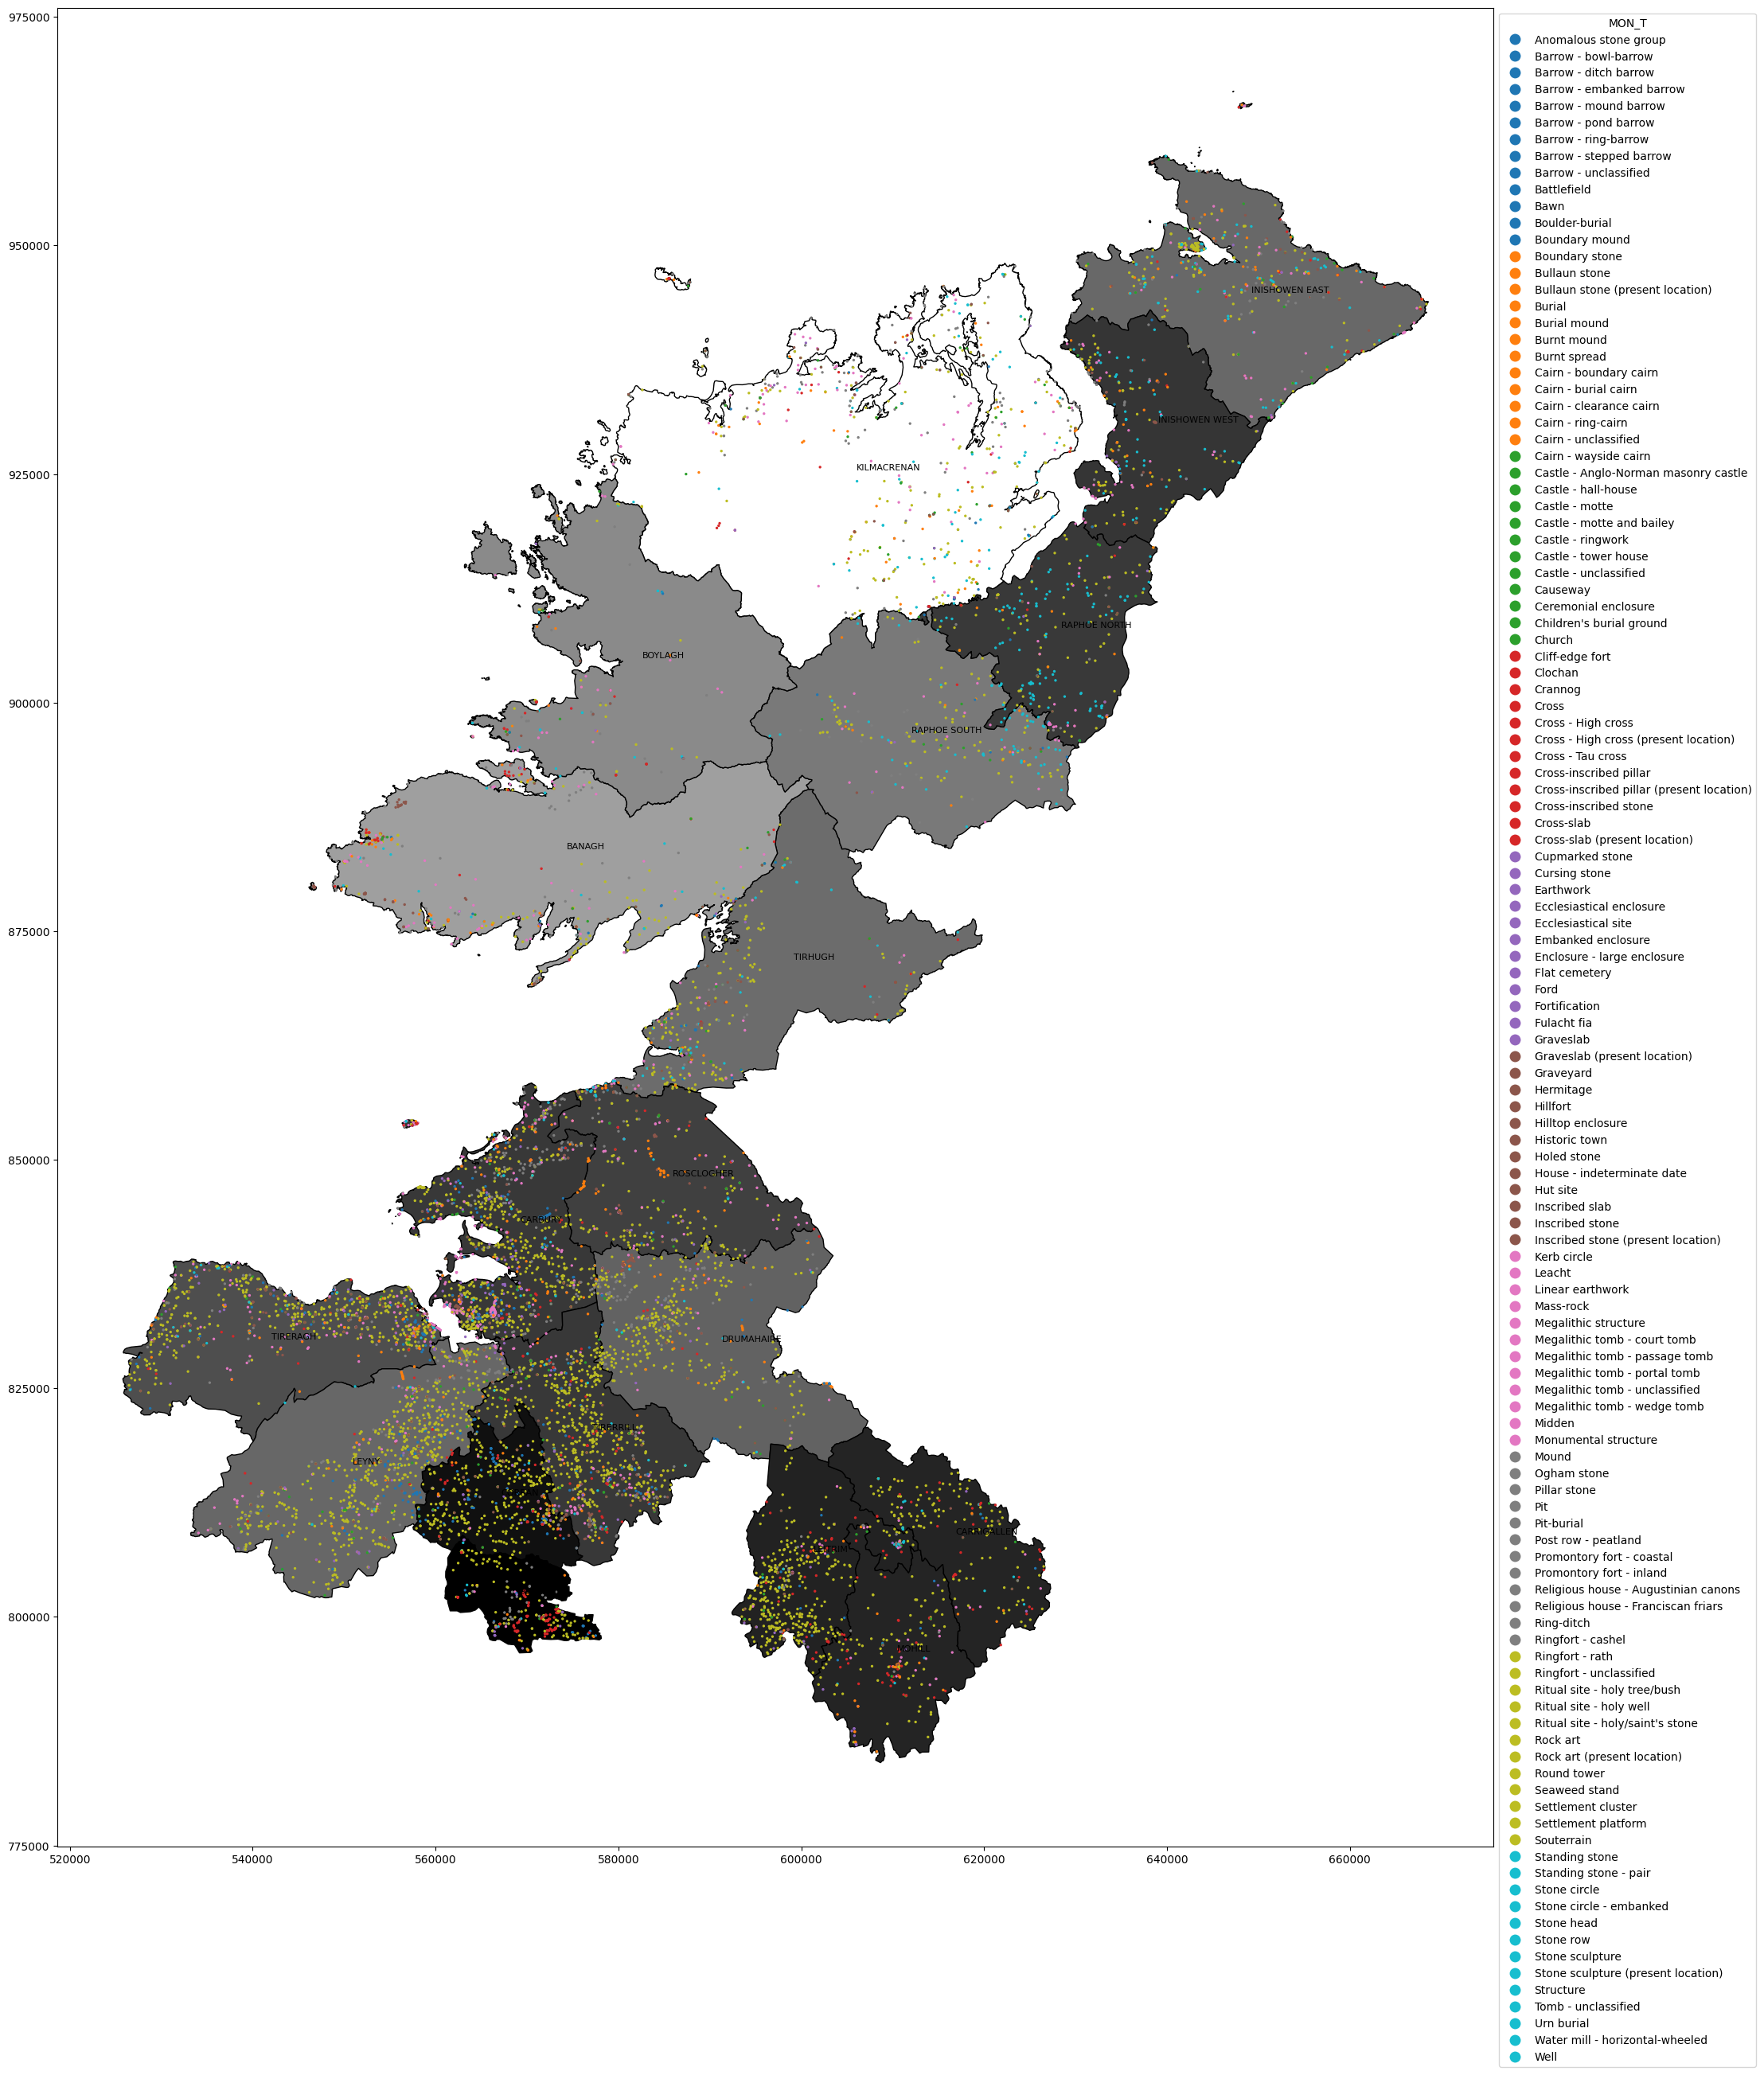

In [35]:
#baronies_NW.plot(column='AREA', legend=True)
#baronies_NW.boundary.plot()

# Plot the baronies and the sites together

fig, ax = plt.subplots(figsize=(30, 30))

baronies_NW.plot(ax=ax,column = 'AREA', cmap = 'Greys_r', facecolor='gray', edgecolor='black', zorder=1,)

sites_nw_clean.plot(ax=ax, column='MONUMENT_T', legend=True,legend_kwds={'title': "MON_T", 'loc': 'upper left', 'bbox_to_anchor': (1, 1)}, markersize=2, zorder=2)

#Annotate each polygon with its 'ENGLISH' name
for x, y, label in zip(baronies_NW.centroid.x, baronies_NW.centroid.y, baronies_NW['ENGLISH']):
    ax.annotate(label, xy=(x, y), xytext=(3, 3), textcoords='offset points', fontsize=8)







In [93]:
from shapely.ops import unary_union

Inis_Eoghan = (unary_union[inishowen_east['geometry'],inishowen_west['geometry']])

TypeError: 'method' object is not subscriptable

NotImplementedError: 

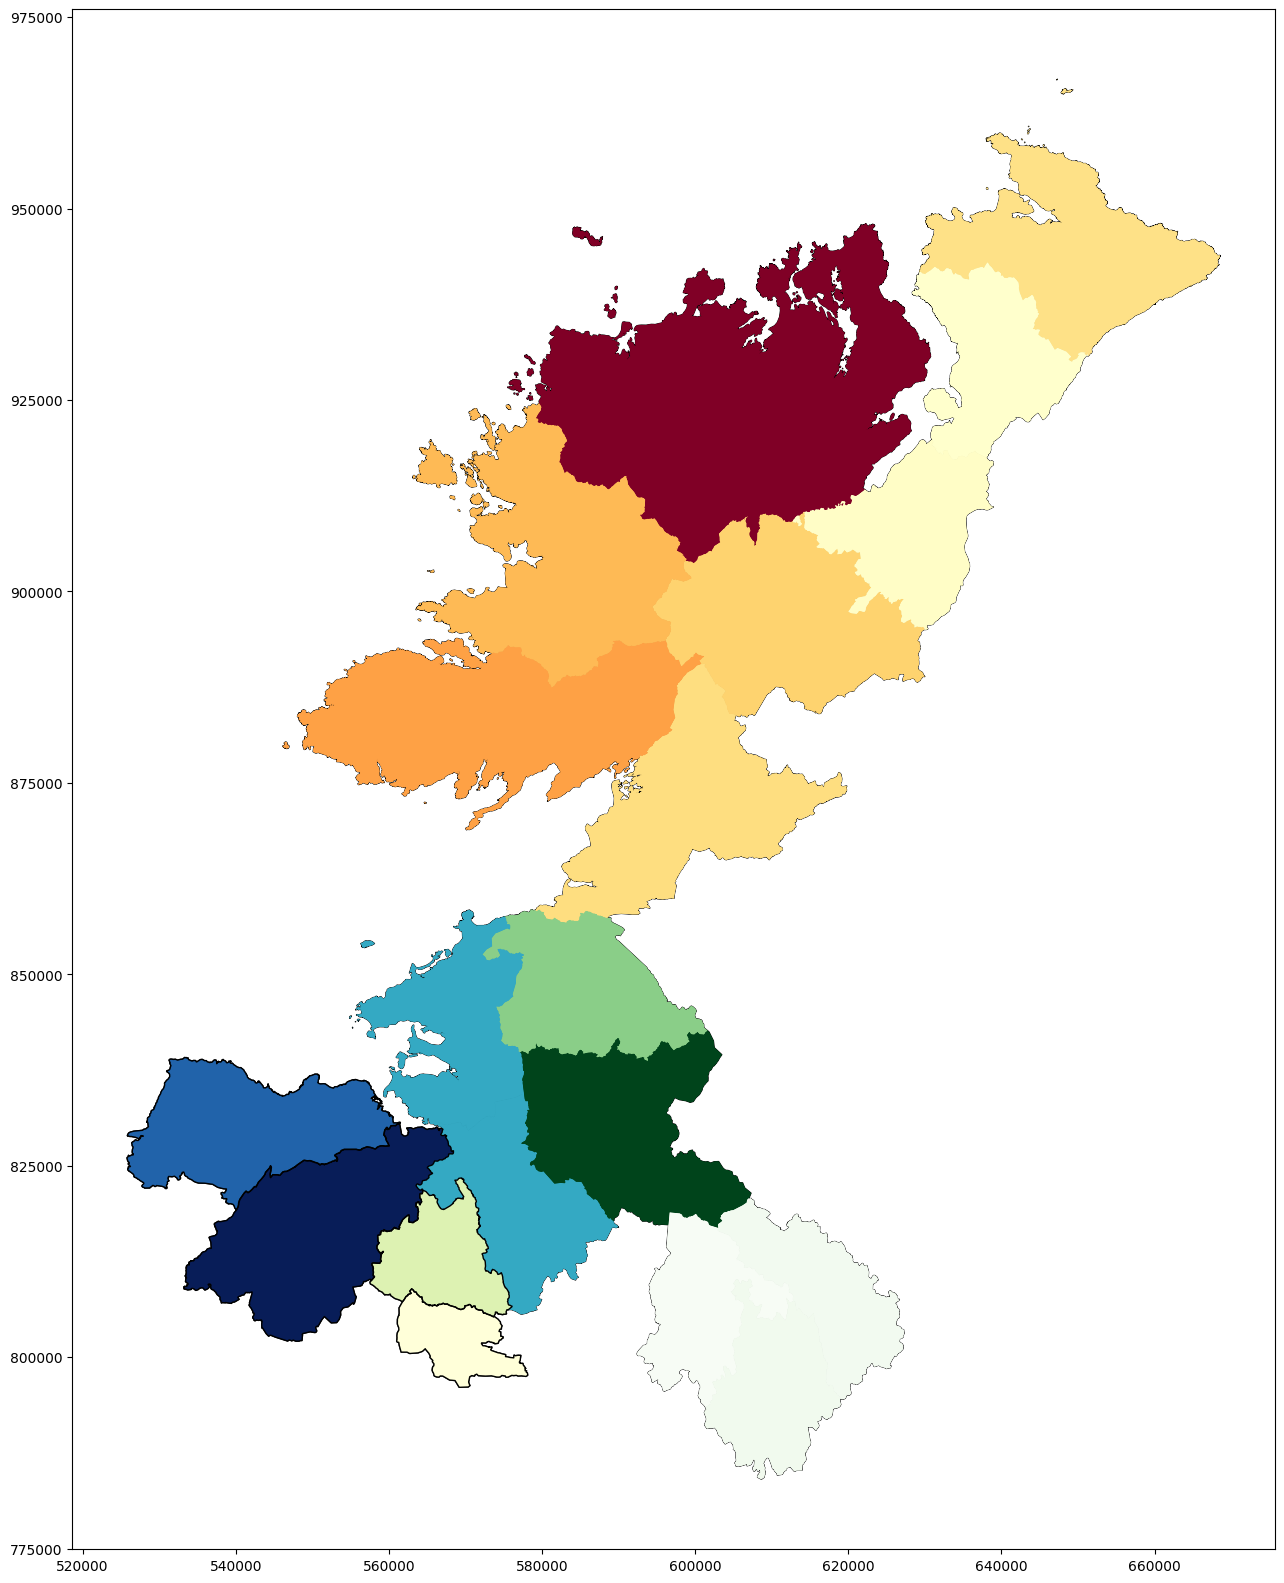

In [ ]:
# Create a subplot with a specified figure size
fig, ax = plt.subplots(figsize=(20, 20))

# Plot the GeoDataFrame on the subplot
baronies_NW.plot(ax=ax, color='gray', edgecolor='black', linewidth=0.9)

# Group baronies by 'COUNTY'
grouped_county = baronies_NW.groupby('COUNTY')

# Extract three groups (you can adjust the condition based on your data)
group1 = grouped_county.get_group('SLIGO')  # Replace 'County1' with the actual county name
group2 = grouped_county.get_group('LEITRIM')  # Replace 'County2' with the actual county name
group3 = grouped_county.get_group('DONEGAL')  # Replace 'County3' with the actual county name

# Plot each group with a different color
#roup1.plot(ax=ax, color='red', label='Group 1')
#group2.plot(ax=ax, color='green', label='Group 2')
#group3.plot(ax=ax, color='blue', label='Group 3')

for county, county_data in grouped_county:
    # Plot the choropleth map based on the 'AREA' column for each county
    group1.plot(ax=ax, column='AREA', cmap='YlGnBu')
    group2.plot(ax=ax, column='AREA', cmap='Greens')
    group3.plot(ax=ax, column='AREA', cmap='YlOrRd')

#Annotate each polygon with its 'ENGLISH' name
for x, y, label in zip(baronies_NW.centroid.x, baronies_NW.centroid.y, baronies_NW['ENGLISH']):
    ax.annotate(label, xy=(x, y), xytext=(3, 3), textcoords='offset points', fontsize=10)


# Show the plot
plt.show()










In [ ]:
#merge_barony = baronies_NW.dissolve(by='COUNTY')

In [ ]:
baronies_NW.info


<bound method DataFrame.info of       BY_ID         ENGLISH             GAEILGE LOGAINM_ID        CONTAE  \
12    59008         TIRHUGH           Tír Aodha         52  Dún na nGall   
42   119002      DRUMAHAIRE     Droim Dhá Thiar        137      Liatroim   
94    59005     KILMACRENAN   Cill Mhic Réanáin         55  Dún na nGall   
129  209003          CORRAN           An Corann        229      Sligeach   
141   59001          BANAGH             Báinigh         54  Dún na nGall   
142  209002        COOLAVIN       Cúil Ó bhFinn        228      Sligeach   
144  119003         LEITRIM            Liatroim        135      Liatroim   
161  209005        TIRERAGH      Tír Fhiachrach        230      Sligeach   
173   59003  INISHOWEN EAST  Inis Eoghain Thoir         57  Dún na nGall   
175  119005      ROSCLOGHER        Ros Clochair        138      Liatroim   
199   59007    RAPHOE SOUTH    Ráth Bhoth Theas         59  Dún na nGall   
204   59004  INISHOWEN WEST  Inis Eoghain Thiar         

Rivers and Lakes data

In [37]:
rivers_lakes = gpd.read_file("/Users/mensab/Documents/GISMapFiles/Rivers&Lakes/Shapefiles")
rivers_lakes

,OBJECTID,SEG_CD,NAME,AREA_,HECTARE,PERIMETER,HYDRO_AR,ORDER_,OS_LAYER,SOURCE,LWB,EDENLakeCo,Shape_STAr,Shape_STLe,geometry
0,1,34_1,NaN,0.002,0.174650,148.152773,34,-99.0,reservoir,epa,N,NaN,1.746498e+03,148.152773,"POLYGON ((113947.176 292650.532, 113947.176 29..."
1,2,34_2,NaN,0.002,0.168753,145.631645,34,-99.0,reservoir,epa,N,NaN,1.687534e+03,145.631645,"POLYGON ((113891.838 292649.223, 113891.838 29..."
2,3,34_3,NaN,0.000,0.045238,75.408867,34,-99.0,reservoir,epa,N,NaN,4.523752e+02,75.408867,"POLYGON ((119811.159 319583.855, 119811.151 31..."
3,4,34_4,NaN,0.001,0.060457,102.438843,34,-99.0,pond,epa,N,NaN,6.045697e+02,102.438843,"POLYGON ((148454.106 281486.625, 148454.362 28..."
4,5,34_5,NaN,0.003,0.259570,206.013992,34,-99.0,pond,epa,N,NaN,2.595699e+03,206.013992,"POLYGON ((141211.791 283056.662, 141213.903 28..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12212,9192,32_509a,Pollacappul Lough,0.254,25.509374,3827.503729,32,5.0,NaN,epa,Y,32001330040,2.550937e+05,3827.503729,"POLYGON ((75473.267 258248.239, 75485.251 2582..."
12213,9193,32_509b,Kylemore Lough,1.335,134.091553,6016.860382,32,5.0,NaN,epa,Y,32001330050,1.340916e+06,6016.860382,"POLYGON ((76100.587 258107.143, 76090.524 2581..."
12214,9194,26_747c,Tap (Lough),0.112,11.254331,2149.103677,26,6.0,LAKE,epa,Y,260155a1815,1.125433e+05,2149.103677,"POLYGON ((200673.808 294130.860, 200881.064 29..."
12215,937,32_402,Beaghcauneen Lough,0.184,18.520070,3378.220801,32,3.0,NaN,epa,Y,32t4_320270,1.852007e+05,3378.220801,"POLYGON ((68219.412 246975.360, 68208.640 2469..."


In [38]:
rivers_lakes.info

<bound method DataFrame.info of        OBJECTID   SEG_CD                NAME  AREA_     HECTARE    PERIMETER  \
0             1     34_1                 NaN  0.002    0.174650   148.152773   
1             2     34_2                 NaN  0.002    0.168753   145.631645   
2             3     34_3                 NaN  0.000    0.045238    75.408867   
3             4     34_4                 NaN  0.001    0.060457   102.438843   
4             5     34_5                 NaN  0.003    0.259570   206.013992   
...         ...      ...                 ...    ...         ...          ...   
12212      9192  32_509a   Pollacappul Lough  0.254   25.509374  3827.503729   
12213      9193  32_509b      Kylemore Lough  1.335  134.091553  6016.860382   
12214      9194  26_747c         Tap (Lough)  0.112   11.254331  2149.103677   
12215       937   32_402  Beaghcauneen Lough  0.184   18.520070  3378.220801   
12216       938   32_403    Connor ( Lough )  0.002    0.166810   160.635907   

      H

In [39]:
rivers_lakes.columns
rivers_lakes.crs

<Projected CRS: EPSG:29902>
Name: TM65 / Irish Grid
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: Ireland - onshore.
- bounds: (-10.56, 51.39, -5.93, 55.43)
Coordinate Operation:
- name: Irish Grid
- method: Transverse Mercator
Datum: TM65
- Ellipsoid: Airy Modified 1849
- Prime Meridian: Greenwich

<Axes: title={'center': 'Rivers and Lakes'}>

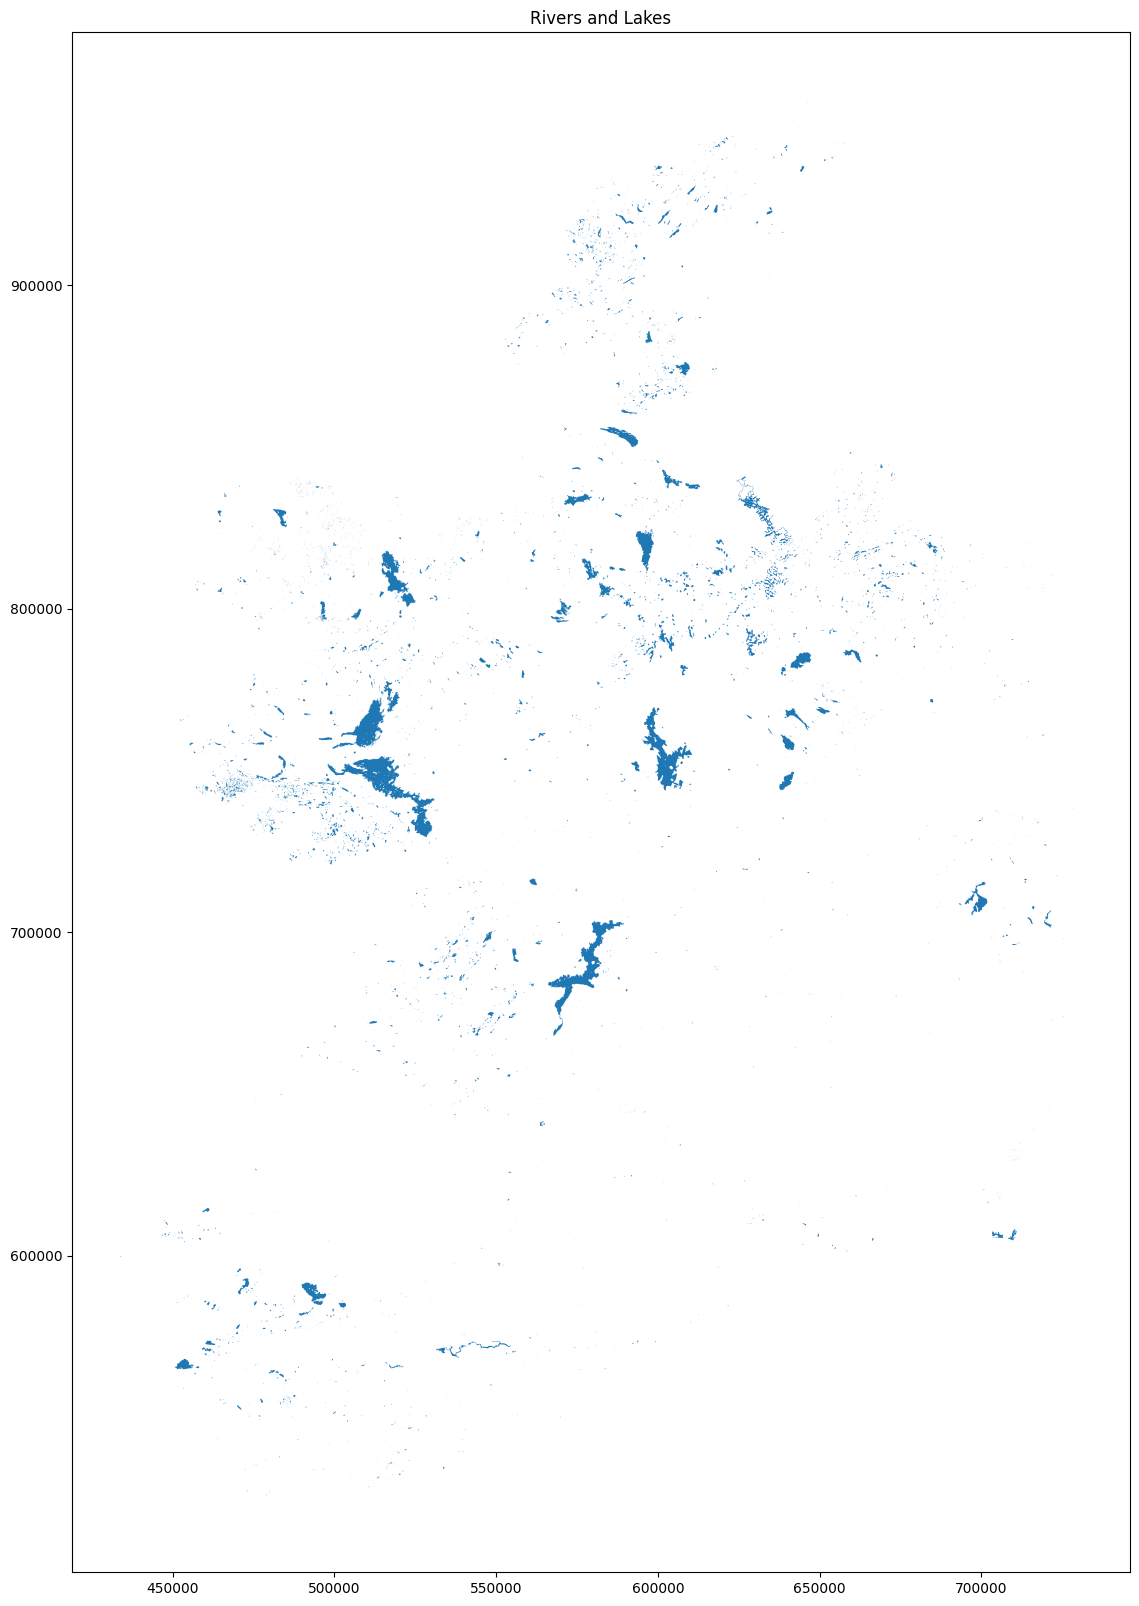

In [40]:
rivers_lakes.to_crs(epsg=2157, inplace=True)

fig, ax = plt.subplots(figsize=(20, 20))
ax.set_title('Rivers and Lakes')
rivers_lakes.plot(ax=ax)


In [41]:
rivers_lakes.crs

<Projected CRS: EPSG:2157>
Name: IRENET95 / Irish Transverse Mercator
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: Ireland - onshore. United Kingdom (UK) - Northern Ireland (Ulster) - onshore.
- bounds: (-10.56, 51.39, -5.34, 55.43)
Coordinate Operation:
- name: Irish Transverse Mercator
- method: Transverse Mercator
Datum: IRENET95
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [42]:
soils_map = gpd.read_file("/Users/mensab/Documents/GISMapFiles/SOIL_SISNationalSoils_shp/Data/SOIL_SISNationalSoils_Shp")
soils_map

,OBJECTID,Associatio,Associat_1,Associat_2,Texture_Su,ha,URL,UniqueID,DRAINAGE,TEXTURE,DEPTH,SHAPE_Leng,SHAPE_Area,SOC,geometry
0,1,1xx,01_Bk,Peat,Peat,8.936193,http://gis.teagasc.ie/soils/,1,Poor,Peat,NaN,1612.721788,8.936193e+04,0.000000,"POLYGON ((74141.240 25254.740, 74092.700 25245..."
1,2,1xx,01_Bk,Peat,Peat,43.004953,http://gis.teagasc.ie/soils/,2,Poor,Peat,NaN,4174.929755,4.300495e+05,0.000000,"POLYGON ((78486.370 30618.920, 78508.940 30610..."
2,3,1xx,01_Bk,Peat,Peat,7.128532,http://gis.teagasc.ie/soils/,3,Poor,Peat,NaN,2277.477286,7.128532e+04,0.000000,"POLYGON ((84084.850 31526.640, 84063.110 31491..."
3,4,1xx,01_Bk,Peat,Peat,7.197259,http://gis.teagasc.ie/soils/,4,Poor,Peat,NaN,1196.079972,7.197259e+04,0.000000,"POLYGON ((91463.380 32014.920, 91460.570 31969..."
4,5,1xx,01_Bk,Peat,Peat,6.084085,http://gis.teagasc.ie/soils/,5,Poor,Peat,NaN,2059.571505,6.084085e+04,0.000000,"POLYGON ((120492.310 32806.090, 120498.080 327..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25138,25139,1100n,1100n,Clashmore,Coarse loamy drift with siliceous stones,848.713170,http://gis.teagasc.ie/soils/,25139,Well,Coarse loamy,>80,9684.906739,2.557408e+06,128.266457,"POLYGON ((67045.300 110520.900, 66988.690 1105..."
25139,25140,0xx,0xx,Blown sand/Dune,Blown sand/Dune,848.713170,http://gis.teagasc.ie/soils/,25140,Other,NaN,NaN,5076.834387,1.722818e+05,0.000000,"POLYGON ((68869.436 110728.769, 68824.262 1107..."
25140,25141,0xx,0xx,Blown sand/Dune,Blown sand/Dune,975.912286,http://gis.teagasc.ie/soils/,25141,Other,NaN,NaN,7006.112925,5.182461e+05,0.000000,"POLYGON ((74033.470 112014.260, 74014.286 1120..."
25141,25142,1030a,1030a,Crosstown,Fine loamy drift with siliceous stones,466.722101,http://gis.teagasc.ie/soils/,25142,imperfectly,Fine loamy,40-80,7890.186816,1.768115e+06,121.136359,"POLYGON ((72098.729 116655.682, 71913.669 1166..."


In [43]:
soils_map.crs

<Projected CRS: EPSG:29902>
Name: TM65 / Irish Grid
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: Ireland - onshore.
- bounds: (-10.56, 51.39, -5.93, 55.43)
Coordinate Operation:
- name: Irish Grid
- method: Transverse Mercator
Datum: TM65
- Ellipsoid: Airy Modified 1849
- Prime Meridian: Greenwich

Vector for storing objects at different times 


In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [ ]:
class StateVector:
    def __init__(self):
        self.vector = {}


    def add_state(self, t, ra, dec, z_0, object_details, inception_point):
            self.vector[t] = {
                'RA': ra,
                'Dec': dec,
                'z_0': z_0,
                'object_details': object_details,
                'inception_point': inception_point
            }

    def get_state(self, t):
        return self.vector[t]
    

In [ ]:
Cairbre_Drom_cliabh = StateVector()
Cairbre_Drom_cliabh.add_state(t=1, ra=10, dec=20, z_0=423, object_details=baronies_NW, inception_point= None)

timestep = 1  # Choose a specific time step
state_timestep = Cairbre_Drom_cliabh.get_state(timestep)

# Extracting information from the state vector
# Extracting information from the state vector
x_coord = state_timestep['RA']
y_coord = state_timestep['Dec']
z_coord = state_timestep['z_0']
object_details = state_timestep['object_details']


Object Details:
      BY_ID         ENGLISH             GAEILGE LOGAINM_ID        CONTAE  \
12    59008         TIRHUGH           Tír Aodha         52  Dún na nGall   
42   119002      DRUMAHAIRE     Droim Dhá Thiar        137      Liatroim   
94    59005     KILMACRENAN   Cill Mhic Réanáin         55  Dún na nGall   
129  209003          CORRAN           An Corann        229      Sligeach   
141   59001          BANAGH             Báinigh         54  Dún na nGall   
142  209002        COOLAVIN       Cúil Ó bhFinn        228      Sligeach   
144  119003         LEITRIM            Liatroim        135      Liatroim   
161  209005        TIRERAGH      Tír Fhiachrach        230      Sligeach   
173   59003  INISHOWEN EAST  Inis Eoghain Thoir         57  Dún na nGall   
175  119005      ROSCLOGHER        Ros Clochair        138      Liatroim   
199   59007    RAPHOE SOUTH    Ráth Bhoth Theas         59  Dún na nGall   
204   59004  INISHOWEN WEST  Inis Eoghain Thiar         53  Dún na nGall

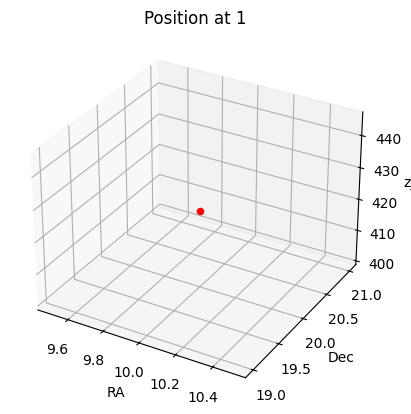

In [ ]:
#Plotting the point
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x_coord, y_coord, z_coord, c='red', marker='o')

ax.set_xlabel('RA')
ax.set_ylabel('Dec')
ax.set_zlabel('z_0')
ax.set_title(f"Position at {timestep}")

# Printing object details
print("Object Details:")
print(object_details)

plt.show()

<bound method DataFrame.info of Empty GeoDataFrame
Columns: [BY_ID, ENGLISH, GAEILGE, LOGAINM_ID, CONTAE, COUNTY, PROVINCE, GUID, CENTROID_X, CENTROID_Y, AREA, OBJECTID, Shape__Are, Shape__Len, geometry]
Index: []>